### DATA CLEANING & PREPARATION
<p> We used this dataset: https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("CreditScoring.csv")

In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.columns = df.columns.str.lower()

<p> We map the categorical values to string values

In [6]:
df.status = df.status.map({
    1: "ok",
    2: "default",
    0: "unk"
})

In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}

In [8]:
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [9]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [11]:
df.income.replace(to_replace=99999999, value=np.nan).max()

np.float64(959.0)

In [12]:
col_to_replace = ["income", "assets", "debt"]
for c in col_to_replace:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [13]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


<p> Let's delete the unknown status row

In [14]:
df[df.status == "unk"]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3309,unk,10,private,60,25,single,no,fixed,35,148.0,3000.0,0.0,1500,1888


In [15]:
df = df[df.status != "unk"].reset_index(drop=True)

In [16]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


<p> Let's split datasets for train/val/test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=21)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=21)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

<p> Let's convert our status to int (default = 1)

In [20]:
y_train = (df_train.status == "default").astype(int).values
y_val = (df_val.status == "default").astype(int).values
y_test = (df_test.status == "default").astype(int).values

In [21]:
del df_train['status']
del df_val['status']
del df_test['status']

In [22]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,5,rent,48,31,married,no,fixed,70,247.0,0.0,0.0,900,1039
1,1,parents,60,22,single,no,fixed,35,90.0,0.0,0.0,1250,1590
2,0,parents,24,20,single,no,partime,35,66.0,0.0,0.0,550,550
3,0,rent,48,35,married,no,fixed,66,206.0,0.0,0.0,1500,1683
4,11,owner,48,34,married,yes,fixed,90,198.0,4500.0,0.0,1650,2165


In [23]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

### INTRODUCTION TO TREES

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [25]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
train_dicts[0]

{'seniority': 5,
 'home': 'rent',
 'time': 48,
 'age': 31,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 70,
 'income': 247.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 900,
 'price': 1039}

In [26]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [27]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
val_dicts = df_val.fillna(0).to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [30]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [31]:
roc_auc_score(y_val, y_pred)

np.float64(0.6506799521040028)

<p> Let's look at training data to predict the score

In [32]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

<p> This model is overfitted, the model simply memorized the data but fails to generalize or predict when new data is used with the model
<p> This is because the tree has not specified max depth
<p> Let's try specifying max depth

In [33]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print("train dataset:", auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("val dataset:", auc)

train dataset: 0.7736648639513267
val dataset: 0.7490744587263574


<p> The auc score is already better & the model is not overfitted

<p> A 1 max depth tree is called a decision stump, cause it is just not a tree

<p> We can also visualize our tree

In [35]:
from sklearn.tree import export_text

In [36]:
print(export_text(dt))

|--- feature_26 <= 0.50
|   |--- feature_27 <= 2.50
|   |   |--- feature_12 <= 87.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  87.50
|   |   |   |--- class: 0
|   |--- feature_27 >  2.50
|   |   |--- feature_12 <= 72.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  72.50
|   |   |   |--- class: 0
|--- feature_26 >  0.50
|   |--- feature_27 <= 4.50
|   |   |--- feature_27 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_27 >  1.50
|   |   |   |--- class: 1
|   |--- feature_27 >  4.50
|   |   |--- feature_12 <= 109.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  109.50
|   |   |   |--- class: 0



In [37]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=yes <= 0.50
|   |--- seniority <= 2.50
|   |   |--- income <= 87.50
|   |   |   |--- class: 1
|   |   |--- income >  87.50
|   |   |   |--- class: 0
|   |--- seniority >  2.50
|   |   |--- income <= 72.50
|   |   |   |--- class: 0
|   |   |--- income >  72.50
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 4.50
|   |   |--- seniority <= 1.50
|   |   |   |--- class: 1
|   |   |--- seniority >  1.50
|   |   |   |--- class: 1
|   |--- seniority >  4.50
|   |   |--- income <= 109.50
|   |   |   |--- class: 1
|   |   |--- income >  109.50
|   |   |   |--- class: 0



### DECISION TREE LEARNING

What are the criteria?
1. Find the best split -> for one feature, eg: assets
2. Stop if max depth is reached
3. If group is still sufficiently large & not pure: repeat for both left & right

Stopping criteria:
1. Group is already pure -> 0 impurity -> all records are of the same output
2. Tree reached max depth
3. Group too small to split -> to avoid overfitting

There are many ways to measure impurity, one is misclassification rate

### DECISION TREE TUNING

Let's conduct experiment with tree deptsh

In [38]:
depths = [1,2,3,4,5,6,7,8,10,15,20,25,None]

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.698
   3 -> 0.749
   4 -> 0.770
   5 -> 0.784
   6 -> 0.779
   7 -> 0.734
   8 -> 0.721
  10 -> 0.690
  15 -> 0.659


  20 -> 0.650
  25 -> 0.650
None -> 0.658


We observed that max depth 4,5,6 yields the best result<br>
Now let's also include min_samples_leaf as a parameter

In [41]:
scores = []

for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))

        # print('%s , %4d -> %.3f' % (s,d,auc))


In [42]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.770496
1,4,2,0.770496
2,4,5,0.770496
3,4,10,0.770496
4,4,15,0.770496


In [44]:
df_scores.sort_values(by="auc", ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.799820
21,6,10,0.796097
23,6,20,0.795779
13,5,15,0.791142
14,5,20,0.790250


We see that with max depth of 6 and min samples leaf of 15, we yields the most accurate model

In [45]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.770  0.784  0.776
2                 0.770  0.784  0.767
5                 0.770  0.787  0.781
10                0.770  0.790  0.796
15                0.770  0.791  0.800
20                0.773  0.790  0.796
100               0.768  0.785  0.785
200               0.756  0.768  0.769
500               0.692  0.692  0.692

In [48]:
import seaborn as sns

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

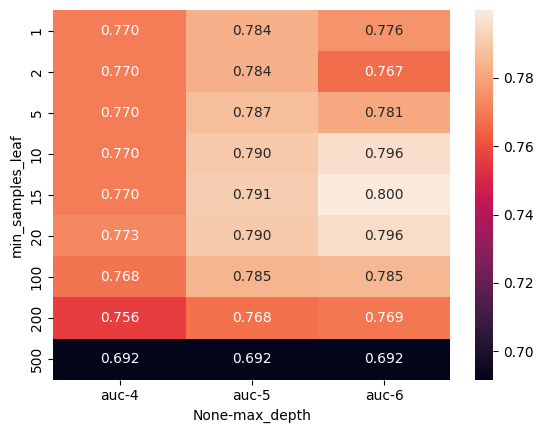

In [52]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

Let's try with more max_depths options

In [56]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))

        # print('%s , %4d -> %.3f' % (s,d,auc))


In [59]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.657  0.770  0.784  0.776  0.736  0.689  0.670  0.661
2                 0.688  0.770  0.784  0.777  0.753  0.710  0.686  0.679
5                 0.751  0.770  0.787  0.787  0.781  0.755  0.748  0.742
10                0.774  0.770  0.790  0.796  0.797  0.786  0.785  0.773
15                0.796  0.770  0.791  0.800  0.797  0.794  0.795  0.793
20                0.798  0.773  0.790  0.796  0.801  0.800  0.797  0.799
100               0.787  0.768  0.785  0.785  0.786  0.787  0.786  0.786
200               0.769  0.756  0.768  0.769  0.769  0.769  0.769  0.769
500               0.692  0.692  0.692  0.692  0.692  0.692  0.692  0.692

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

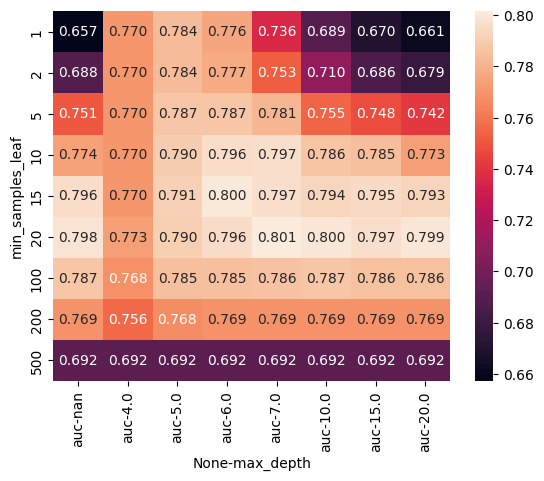

In [60]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")